# Welcome to Notebook 1 of the HELINA Workshop

## This notebook will wrangle data tables from the BAIS 2013 report and store as dataframes

### We will be using a Python module called Camelot-Py which allows us to wrangle data from PDF documents

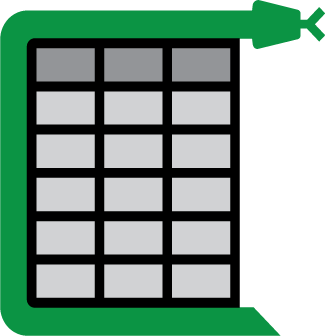

In [2]:
## import the needed python modules to wrangle data from the BAIS 2013 PDF report

In [3]:
import pandas as pd   # Pandas is a data-management swiss army knife ---that has utility for data frames

In [4]:
import camelot  # Camelot-py is a python module for wrangling data tables from PDF documents

## The Camelot-py module uses two different methods to wrangle data tables...

## Lattice is a method that Camelot uses to wrangle tables with dark lined cell boundaries.

## Stream is a method that Camelot uses to wrangle tables with no lines or white space

## We will wrangle 3 data tables from the BAIS 2013 PDF report

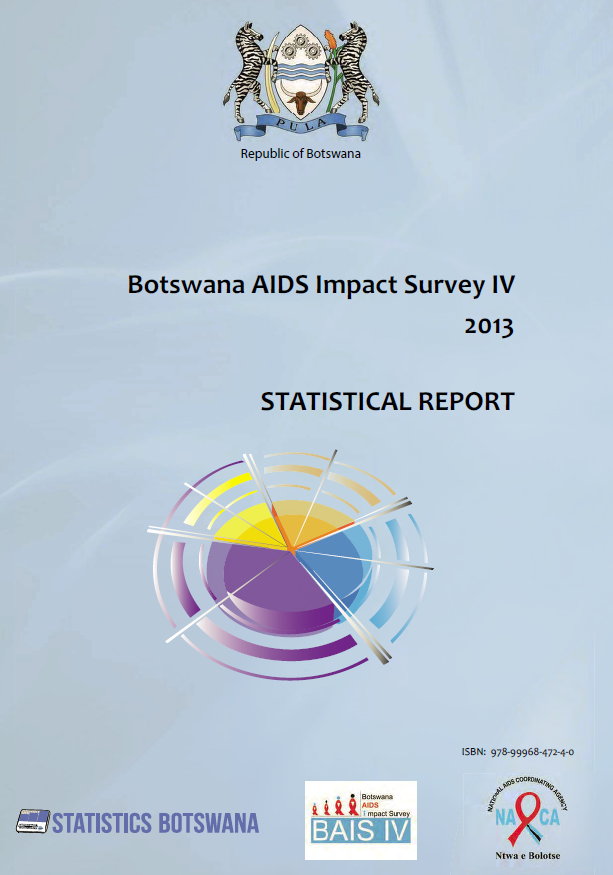

### The first table we need to wrangle is Table 5 on page 38 of the 260 page report.

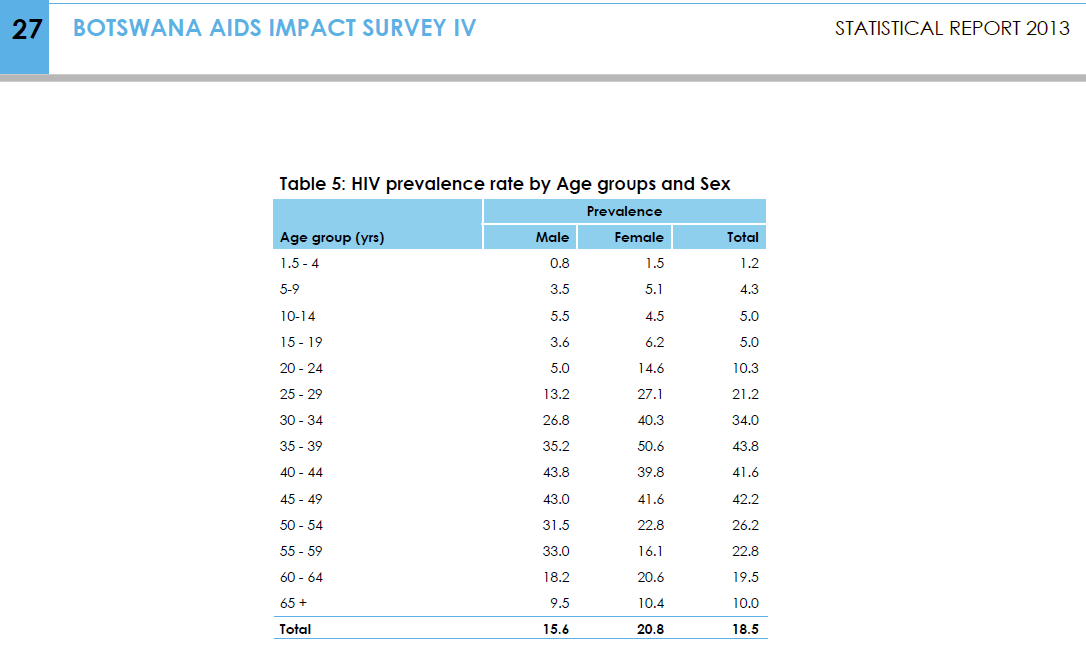

## Notice that the BAIS 2013 report contains tables with white cell boundaries or no boundaries

### This means that we will need to use the parameter of flavor = 'stream' so that we use the Stream method.

### We will use the flavor = 'stream' method within Camelot for each of the 3 tables that we wrangle.

In [5]:
wrangletable5 = camelot.read_pdf('./resources/BAIS2013.pdf', flavor='stream', pages='38')
wrangletable5[0].df
%time

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.81 µs


In [5]:
wrangletable5

<TableList n=2>

In [6]:
wrangletable5.export('outputs/BAIS2013_table5.csv', f='csv', compress=True) #json, excel, html

In [7]:
wrangletable5[0].parsing_report

{'accuracy': 98.82, 'whitespace': 8.33, 'order': 1, 'page': 38}

In [8]:
wrangletable5[0].df

,0,1,2,3
0,,Table 5: HIV prevalence rate by Age groups and...,,
1,,,Prevalence,
2,Age group (yrs),Male,Female,Total
3,1.5 - 4,0.8,1.5,1.2
4,5-9,3.5,5.1,4.3
5,10-14,5.5,4.5,5.0
6,15 - 19,3.6,6.2,5.0
7,20 - 24,5.0,14.6,10.3
8,25 - 29,13.2,27.1,21.2
9,30 - 34,26.8,40.3,34.0


### Notice that the top 2 rows of the dataframe are not the field names and need to be dropped

In [9]:
droprowstable5 = wrangletable5[0].df

In [10]:
table5 = droprowstable5.drop([0,1,2])

In [11]:
table5

,0,1,2,3
3,1.5 - 4,0.8,1.5,1.2
4,5-9,3.5,5.1,4.3
5,10-14,5.5,4.5,5.0
6,15 - 19,3.6,6.2,5.0
7,20 - 24,5.0,14.6,10.3
8,25 - 29,13.2,27.1,21.2
9,30 - 34,26.8,40.3,34.0
10,35 - 39,35.2,50.6,43.8
11,40 - 44,43.8,39.8,41.6
12,45 - 49,43.0,41.6,42.2


## next we will set the column names for the dataframe

In [12]:
table5.columns = ['AgeGroup', 'Male', 'Female', 'Total']

#### We will print the column names to be sure that the dataframe columns are set

In [13]:
for col in table5.columns: 
    print(col) 

AgeGroup
Male
Female
Total


In [14]:
table5

,AgeGroup,Male,Female,Total
3,1.5 - 4,0.8,1.5,1.2
4,5-9,3.5,5.1,4.3
5,10-14,5.5,4.5,5.0
6,15 - 19,3.6,6.2,5.0
7,20 - 24,5.0,14.6,10.3
8,25 - 29,13.2,27.1,21.2
9,30 - 34,26.8,40.3,34.0
10,35 - 39,35.2,50.6,43.8
11,40 - 44,43.8,39.8,41.6
12,45 - 49,43.0,41.6,42.2


## Next, we will preserve this dataframe, using a technique called Pickling

#### We will store the dataframe in a "pickle" and this file can be read again and again in this notebook and other notebooks....

In [15]:
table5.to_pickle('table5pickle.pkl')

#### Congratulations !  you have wrangled and pickled the first data table that we will use within this workshop !

## Next, we will repeat this process for Table 6 on page 40 of the BAIS 2013 report

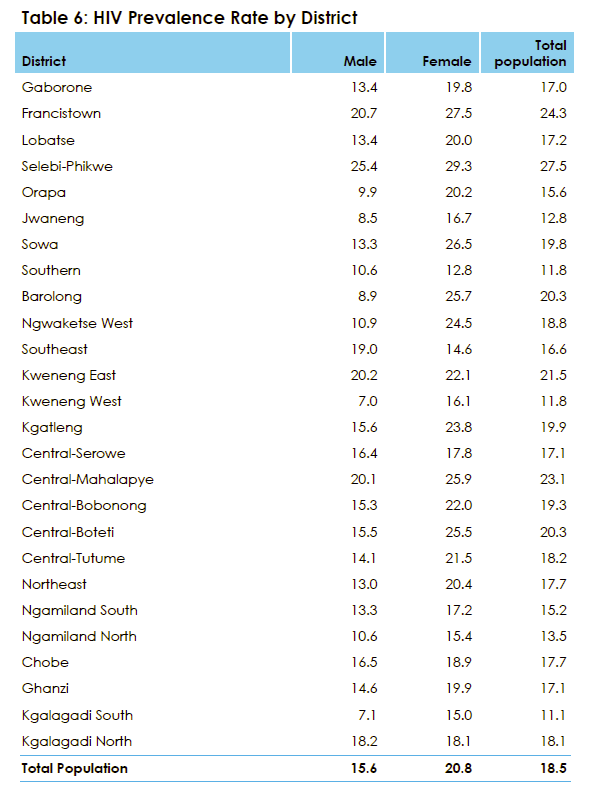

In [16]:
wrangletable6 = camelot.read_pdf('./resources/BAIS2013.pdf', flavor='stream', pages='40')
wrangletable6[0].df
%time

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs


In [17]:
wrangletable6

<TableList n=2>

In [18]:
wrangletable6.export('outputs/BAIS2013_table6.csv', f='csv', compress=True) #json, excel, html

In [19]:
wrangletable6[0].parsing_report

{'accuracy': 99.71, 'whitespace': 5.0, 'order': 1, 'page': 40}

In [20]:
wrangletable6[0].df

,0,1,2,3
0,Table 6: HIV Prevalence Rate by District,,,
1,,,,Total
2,District,Male,Female,population
3,Gaborone,13.4,19.8,17.0
4,Francistown,20.7,27.5,24.3
5,Lobatse,13.4,20.0,17.2
6,Selebi-Phikwe,25.4,29.3,27.5
7,Orapa,9.9,20.2,15.6
8,Jwaneng,8.5,16.7,12.8
9,Sowa,13.3,26.5,19.8


### Notice that the top 2 rows of the dataframe are not the field names and need to be dropped

In [21]:
droprowstable6 = wrangletable6[0].df

In [22]:
table6 = droprowstable6.drop([0,1,2])

In [23]:
table6

,0,1,2,3
3,Gaborone,13.4,19.8,17.0
4,Francistown,20.7,27.5,24.3
5,Lobatse,13.4,20.0,17.2
6,Selebi-Phikwe,25.4,29.3,27.5
7,Orapa,9.9,20.2,15.6
8,Jwaneng,8.5,16.7,12.8
9,Sowa,13.3,26.5,19.8
10,Southern,10.6,12.8,11.8
11,Barolong,8.9,25.7,20.3
12,Ngwaketse West,10.9,24.5,18.8


## next we will set the column names for the dataframe

In [24]:
table6.columns = ['District', 'Male', 'Female', 'TotalPop']

#### We will print the column names to be sure that the dataframe columns are set

In [25]:
for col in table6.columns: 
    print(col) 

District
Male
Female
TotalPop


In [26]:
table6

,District,Male,Female,TotalPop
3,Gaborone,13.4,19.8,17.0
4,Francistown,20.7,27.5,24.3
5,Lobatse,13.4,20.0,17.2
6,Selebi-Phikwe,25.4,29.3,27.5
7,Orapa,9.9,20.2,15.6
8,Jwaneng,8.5,16.7,12.8
9,Sowa,13.3,26.5,19.8
10,Southern,10.6,12.8,11.8
11,Barolong,8.9,25.7,20.3
12,Ngwaketse West,10.9,24.5,18.8


## Next, we will preserve this dataframe, using a technique called Pickling

#### We will store the dataframe in a "pickle" and this file can be read again and again in this notebook and other notebooks....

In [27]:
table6.to_pickle('table6pickle.pkl')

#### Congratulations !  you have wrangled and pickled the second data table that we will use within this workshop !

## Next, we will repeat this process for Table 3 on page 46 of the BAIS 2013 report

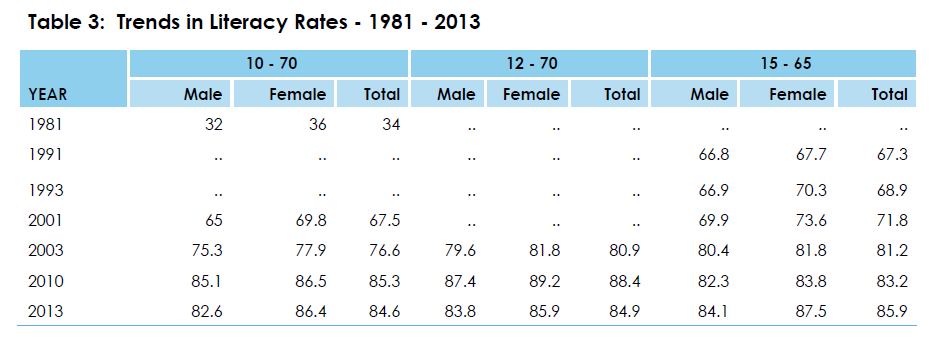

In [28]:
wrangletable3 = camelot.read_pdf('./resources/BAIS2013.pdf', flavor='stream', pages='46')
wrangletable3[0].df
%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [29]:
wrangletable3

<TableList n=1>

In [30]:
wrangletable3.export('outputs/BAIS2013_table3.csv', f='csv', compress=True) #json, excel, html

In [31]:
wrangletable3[0].parsing_report

{'accuracy': 98.0, 'whitespace': 22.73, 'order': 1, 'page': 46}

In [32]:
wrangletable3[0].df

,0,1,2,3,4,5,6,7,8,9
0,percent from the 2009/10 Botswana Core Welfare...,,,,,,,,,
1,,Table 3: Trends in Literacy Rates - 1981 - 2013,,,,,,,,
2,,,10 - 70,,,12 - 70,,,15 - 65,
3,YEAR,Male,Female,Total,Male,Female,Total,Male,Female,Total
4,1981,32,36,34,..,..,..,..,..,..
5,1991,..,..,..,..,..,..,66.8,67.7,67.3
6,1993,..,..,..,..,..,..,66.9,70.3,68.9
7,2001,65,69.8,67.5,..,..,..,69.9,73.6,71.8
8,2003,75.3,77.9,76.6,79.6,81.8,80.9,80.4,81.8,81.2
9,2010,85.1,86.5,85.3,87.4,89.2,88.4,82.3,83.8,83.2


### We will use only the last 3 rows of the data for 2003, 2010, and 2013.  The other rows will be dropped

In [33]:
droprowstable3 = wrangletable3[0].df

In [34]:
table3 = droprowstable3.drop([0,1,2,3,4,5,6,7])

In [35]:
table3

,0,1,2,3,4,5,6,7,8,9
8,2003,75.3,77.9,76.6,79.6,81.8,80.9,80.4,81.8,81.2
9,2010,85.1,86.5,85.3,87.4,89.2,88.4,82.3,83.8,83.2
10,2013,82.6,86.4,84.6,83.8,85.9,84.9,84.1,87.5,85.9


## next we will set the column names for the dataframe

In [36]:
table3.columns = ['Year', 'Male1070', 'Female1070', 'Total1070', 'Male1270', 'Female1270', 'Total1270', 'Male1565', 'Female1565', 'Total1565']

#### We will print the column names to be sure that the dataframe columns are set

In [37]:
for col in table3.columns: 
    print(col) 

Year
Male1070
Female1070
Total1070
Male1270
Female1270
Total1270
Male1565
Female1565
Total1565


In [38]:
table3

,Year,Male1070,Female1070,Total1070,Male1270,Female1270,Total1270,Male1565,Female1565,Total1565
8,2003,75.3,77.9,76.6,79.6,81.8,80.9,80.4,81.8,81.2
9,2010,85.1,86.5,85.3,87.4,89.2,88.4,82.3,83.8,83.2
10,2013,82.6,86.4,84.6,83.8,85.9,84.9,84.1,87.5,85.9


## Next, we will preserve this dataframe, using a technique called Pickling

#### We will store the dataframe in a "pickle" and this file can be read again and again in this notebook and other notebooks....

In [39]:
table3.to_pickle('table3pickle.pkl')

## Congratulations !  you have wrangled and pickled each of the 3 data tables that we will use within this workshop !   You are done with this notebook and will now proceed to Notebook 2.